In [312]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams["axes.formatter.use_mathtext"] = True 
sns.set(font="cmr10")
sns.set_theme(style="whitegrid", context="paper", font="cmr10")

def save_figure(name):
    plt.savefig(f"exports/{name}.pdf", format="pdf")

In [313]:
raw_data = pd.read_csv("datasets/demographics.csv")
raw_data.head()

,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Fluent languages,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,6461d65a43b0df601ecdcdfc,577a04dbadbc7500015d2475,APPROVED,2023-05-15T06:51:06.742000Z,2023-05-15T07:10:28.728000Z,2023-05-16T10:08:18.872000,2023-05-15T07:10:29.321693Z,1162,C17VGRV0,68,English,30,Female,White,United Kingdom,United Kingdom,United Kingdom,English,DATA_EXPIRED,DATA_EXPIRED
1,6461d693b89d0cecc1d7d324,5bd3a8173043160001943d9b,APPROVED,2023-05-15T06:52:03.915000Z,2023-05-15T07:18:35.263000Z,2023-05-16T10:08:19.138000,2023-05-15T07:18:35.652949Z,1592,C17VGRV0,335,English,54,Female,White,Australia,Australia,Australia,English,No,"Not in paid work (e.g. homemaker', 'retired or..."
2,6461d7afa177d07e6409f134,5c33da29221fad0001cc605a,APPROVED,2023-05-15T06:56:47.296000Z,2023-05-15T07:27:37.300000Z,2023-05-16T10:08:19.395000,2023-05-15T07:27:38.190125Z,1851,C17VGRV0,36,"Spanish, Japanese, French, English",33,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,DATA_EXPIRED
3,6461e67974a4f42bae118449,5e207c8250207f3829b18445,APPROVED,2023-05-15T07:59:53.803000Z,2023-05-15T08:29:29.492000Z,2023-05-16T10:08:19.634000,2023-05-15T08:29:29.945718Z,1776,C17VGRV0,54,"Spanish, English, Portuguese",31,Female,Other,Portugal,Portugal,Portugal,Portuguese,No,Full-Time
4,6461f867099494508e434d91,5b7ee08c39836a0001665d70,APPROVED,2023-05-15T09:16:23.108000Z,2023-05-15T09:30:38.794000Z,2023-05-16T10:08:19.871000,2023-05-15T09:30:39.232662Z,856,C17VGRV0,381,English,45,Male,White,Poland,Poland,Poland,Polish,No,Full-Time


In [314]:
participant_id = "Participant id"
langs = "Fluent languages"
age = "Age"
gender = "Sex"
ethnicity = "Ethnicity simplified"
birth = "Country of birth"
country = "Country of residence"
nationality = "Nationality"
language = "Language"
student_status = "Student status"
employment = "Employment status"

In [315]:
data = raw_data.drop(
    columns=[
        "Started at",
        "Completed at",
        "Reviewed at",
        "Archived at",
        "Time taken",
        "Completion code",
        "Total approvals",
        "Submission id",
        "Status",
    ]
)

data.head()

,Participant id,Fluent languages,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,577a04dbadbc7500015d2475,English,30,Female,White,United Kingdom,United Kingdom,United Kingdom,English,DATA_EXPIRED,DATA_EXPIRED
1,5bd3a8173043160001943d9b,English,54,Female,White,Australia,Australia,Australia,English,No,"Not in paid work (e.g. homemaker', 'retired or..."
2,5c33da29221fad0001cc605a,"Spanish, Japanese, French, English",33,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,DATA_EXPIRED
3,5e207c8250207f3829b18445,"Spanish, English, Portuguese",31,Female,Other,Portugal,Portugal,Portugal,Portuguese,No,Full-Time
4,5b7ee08c39836a0001665d70,English,45,Male,White,Poland,Poland,Poland,Polish,No,Full-Time


In [316]:
data[ethnicity].value_counts()

Ethnicity simplified
White    55
Black     2
Other     1
Asian     1
Name: count, dtype: int64

In [317]:
data[nationality].value_counts()

Nationality
United Kingdom    20
Poland             8
Portugal           7
Italy              7
Canada             3
Netherlands        2
Hungary            2
South Africa       2
Australia          1
Mexico             1
United States      1
Albania            1
Ireland            1
New Zealand        1
Greece             1
Spain              1
Name: count, dtype: int64

In [318]:
data[student_status].value_counts()

Student status
No              37
Yes             13
DATA_EXPIRED     9
Name: count, dtype: int64

In [319]:
data[gender].value_counts()

Sex
Female    36
Male      23
Name: count, dtype: int64

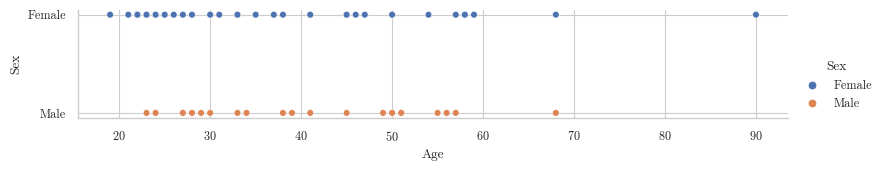

In [372]:
plot = sns.relplot(data=data[[age, gender]], x=age, y=gender, hue=gender, height=1.8, aspect=4.5)

save_figure("gender_age")

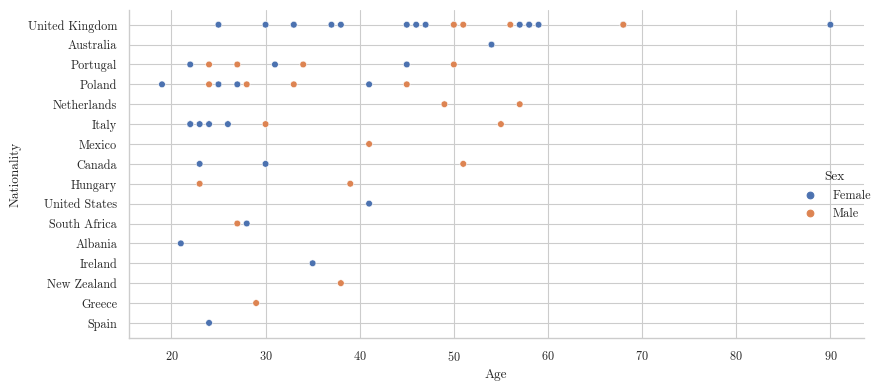

In [373]:
plot = sns.relplot(
    data=data[[nationality, age, gender]],
    x=age,
    y=nationality,
    hue=gender,
    height=4,
    aspect=2,
)
plt.tight_layout()
save_figure("nationalities_by_gender_and_age")